In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

In [2]:
concrete = pd.read_csv('datasets/concrete_data.csv')

concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
X = concrete.drop('csMPa', axis=1)

Y = concrete['csMPa']

In [4]:
X = X.drop(['flyash', 'coarseaggregate', 'fineaggregate'], axis=1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
baseline = GradientBoostingRegressor(max_depth=3, n_estimators=50)
baseline.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=50)

In [7]:
y_pred = baseline.predict(x_test)

r2_score(y_test, y_pred)

0.8614995659754496

In [8]:
important_features = pd.Series(baseline.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

age                 0.368302
cement              0.359630
slag                0.097241
water               0.093447
superplasticizer    0.081379
dtype: float64

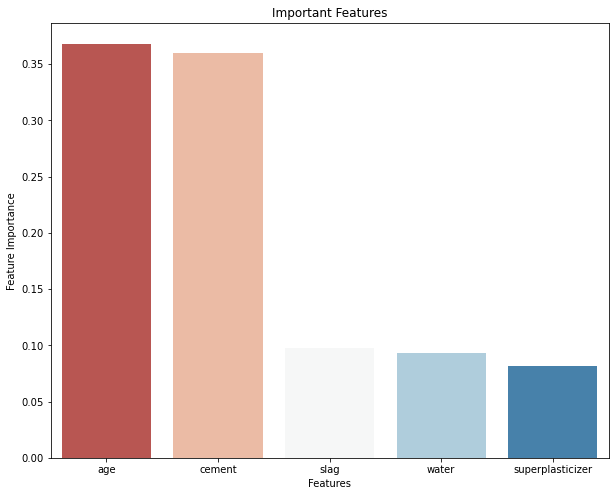

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

In [10]:
gbr = GradientBoostingRegressor(max_depth=3)

In [11]:
parameters = {'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400, 500]}

gridsearch_reg = GridSearchCV(estimator=gbr, param_grid=parameters, cv=3)

In [12]:
gridsearch_reg.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [1, 5, 10, 50, 100, 200, 300, 400,
                                          500]})

In [13]:
gridsearch_reg.best_params_

{'n_estimators': 500}

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
gbr = GradientBoostingRegressor(max_depth=3, 
                                n_estimators = gridsearch_reg.best_params_['n_estimators'])

gbr_best.fit(x_train, y_train)

NameError: name 'gbr_best' is not defined

In [ ]:
y_pred = gbr_best.predict(x_test)

r2_score(y_test, y_pred)

In [16]:
gbr = GradientBoostingRegressor(max_depth=3, warm_start=True)

### Tuning for n_estimators
warm_start=True  allows you to add more estimators to an already fitted model.

In [17]:
min_val_error = float("inf")
error_increasing = 0

for n_estimators in range(1, 1000):
    gbr.n_estimators = n_estimators
    gbr.fit(x_train, y_train)
    
    y_pred = gbr.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    
    print('No. of estimators: ', gbr.n_estimators_)
    print('Validation error: ', val_error)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_increasing = 0
    else:
        error_increasing += 1
        if error_increasing == 10:
            break

No. of estimators:  1
Validation error:  270.3572829008696
No. of estimators:  2
Validation error:  244.1590938133431
No. of estimators:  3
Validation error:  220.37161439172263
No. of estimators:  4
Validation error:  200.6781918317161
No. of estimators:  5
Validation error:  181.87145740362283
No. of estimators:  6
Validation error:  166.54488402117653
No. of estimators:  7
Validation error:  153.99368936426606
No. of estimators:  8
Validation error:  143.38435064544774
No. of estimators:  9
Validation error:  133.44987227463002
No. of estimators:  10
Validation error:  124.73772792720729
No. of estimators:  11
Validation error:  117.35448194656509
No. of estimators:  12
Validation error:  110.36987975430812
No. of estimators:  13
Validation error:  104.65172917851335
No. of estimators:  14
Validation error:  100.01156817523005
No. of estimators:  15
Validation error:  94.77845551289481
No. of estimators:  16
Validation error:  89.79201582413977
No. of estimators:  17
Validation erro

No. of estimators:  137
Validation error:  22.151969251026042
No. of estimators:  138
Validation error:  22.086764112235993
No. of estimators:  139
Validation error:  22.0620686695141
No. of estimators:  140
Validation error:  22.026774416162667
No. of estimators:  141
Validation error:  21.997321019332006
No. of estimators:  142
Validation error:  21.99901919436245
No. of estimators:  143
Validation error:  21.961457997525393
No. of estimators:  144
Validation error:  21.915409175416173
No. of estimators:  145
Validation error:  21.780056768495317
No. of estimators:  146
Validation error:  21.822659102082927
No. of estimators:  147
Validation error:  21.8314491068435
No. of estimators:  148
Validation error:  21.843036025478522
No. of estimators:  149
Validation error:  21.722158546272787
No. of estimators:  150
Validation error:  21.699087172388698
No. of estimators:  151
Validation error:  21.748645172050626
No. of estimators:  152
Validation error:  21.64402608240787
No. of estimat

No. of estimators:  276
Validation error:  17.834850272189804
No. of estimators:  277
Validation error:  17.801441919724862
No. of estimators:  278
Validation error:  17.78307899700994
No. of estimators:  279
Validation error:  17.796662863906697
No. of estimators:  280
Validation error:  17.809268775743533
No. of estimators:  281
Validation error:  17.742879629200072
No. of estimators:  282
Validation error:  17.723782291442145
No. of estimators:  283
Validation error:  17.727348231449227
No. of estimators:  284
Validation error:  17.685508681515604
No. of estimators:  285
Validation error:  17.6626063586514
No. of estimators:  286
Validation error:  17.64135923628834
No. of estimators:  287
Validation error:  17.64427111138726
No. of estimators:  288
Validation error:  17.555528706722875
No. of estimators:  289
Validation error:  17.547118177915724
No. of estimators:  290
Validation error:  17.520941169299494
No. of estimators:  291
Validation error:  17.508260875561522
No. of estima

No. of estimators:  412
Validation error:  16.074728774941246
No. of estimators:  413
Validation error:  16.074495464536668
No. of estimators:  414
Validation error:  16.035858458890694
No. of estimators:  415
Validation error:  16.03496133007922
No. of estimators:  416
Validation error:  16.020635626810037
No. of estimators:  417
Validation error:  16.027452310458006
No. of estimators:  418
Validation error:  16.03738899232226
No. of estimators:  419
Validation error:  16.03214497194246
No. of estimators:  420
Validation error:  16.031435084978717
No. of estimators:  421
Validation error:  16.022989943230744
No. of estimators:  422
Validation error:  16.015894107462664
No. of estimators:  423
Validation error:  15.976185302850164
No. of estimators:  424
Validation error:  15.977104160301595
No. of estimators:  425
Validation error:  15.957673280702922
No. of estimators:  426
Validation error:  15.948093396743108
No. of estimators:  427
Validation error:  15.947094346791898
No. of esti

In [18]:
n_estimators

488

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
gbr_best = GradientBoostingRegressor(max_depth=3,
                                     n_estimators = n_estimators)

In [21]:
gbr_best.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=488)

In [22]:
y_pred = gbr_best.predict(x_test)

r2_score(y_test, y_pred)

0.9436286395107285